In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

with open('TraversalDetails10.txt', 'r') as file:
    lines = file.readlines()
trains = []
for i in range(len(lines)):
  str = lines[i].strip()
  if "Printing timetables" in str:
    trains.append(str[-1])

In [ ]:
trains = list(set(trains))

In [ ]:
trains

['4', '7', '3', '2', '1', '9', '0', '6', '5', '8']

In [ ]:
def calculate_traversal_time(train_data):
    departure_times = [float(line.split()[-1]) for line in train_data if line.startswith('Loop')]
    return departure_times[-1] - departure_times[0]
avg_traversal_time_list = []
number_of_train_in_day = []
for i in range(30):
  a = f"TraversalDetails{i}.txt"


  with open(a, 'r') as file:
      lines = file.readlines()

  train_id = None
  train_data = []
  train_traversal_times = {}

  for line in lines:
      if line.startswith('Printing timetables for train'):
          if train_data:
              train_traversal_times[train_id] = calculate_traversal_time(train_data)

          train_id = int(line.split()[-1])

          train_data = []
      else:

          train_data.append(line)


  if train_data:
      train_traversal_times[train_id] = calculate_traversal_time(train_data)
  traversal_time_list = []
  num_of_trains = []

  for train_id, traversal_time in train_traversal_times.items():
      num_of_trains.append(train_id)
      traversal_time_list.append(traversal_time)
      print(f"Train {train_id}: Traversal Time - {traversal_time:.2f} minutes")

  number_of_train_in_day.append(len(num_of_trains))
  avg_traversal_time_list.append(sum(traversal_time_list)/len(traversal_time_list))


Train 1: Traversal Time - 334.06 minutes
Train 2: Traversal Time - 341.29 minutes
Train 3: Traversal Time - 348.84 minutes
Train 4: Traversal Time - 356.38 minutes
Train 5: Traversal Time - 363.92 minutes
Train 6: Traversal Time - 371.47 minutes
Train 7: Traversal Time - 379.01 minutes
Train 8: Traversal Time - 386.55 minutes
Train 9: Traversal Time - 394.09 minutes
Train 10: Traversal Time - 401.64 minutes
Train 11: Traversal Time - 409.18 minutes
Train 12: Traversal Time - 320.05 minutes
Train 13: Traversal Time - 327.66 minutes
Train 14: Traversal Time - 335.21 minutes
Train 15: Traversal Time - 342.75 minutes
Train 16: Traversal Time - 350.29 minutes
Train 17: Traversal Time - 357.83 minutes
Train 18: Traversal Time - 365.38 minutes
Train 19: Traversal Time - 372.92 minutes
Train 20: Traversal Time - 380.46 minutes
Train 21: Traversal Time - 388.01 minutes
Train 22: Traversal Time - 395.55 minutes
Train 23: Traversal Time - 397.18 minutes
Train 24: Traversal Time - 398.03 minutes
T

In [ ]:
number_of_train_in_day

[29,
 28,
 30,
 19,
 42,
 17,
 54,
 17,
 42,
 40,
 42,
 22,
 29,
 38,
 31,
 42,
 42,
 43,
 16,
 19,
 17,
 27,
 23,
 49,
 19,
 22,
 22,
 23,
 31,
 25]

In [ ]:
sum(avg_traversal_time_list)/len(avg_traversal_time_list)

272.4970104298401

In [ ]:
avg_traversal_time_list

[373.1297896147007,
 222.52971178378107,
 219.11311242578768,
 208.35380962018328,
 379.4154133908297,
 296.2200080651533,
 287.32036505746333,
 244.09952759214025,
 357.7766737079623,
 260.2084082472551,
 270.92834843196766,
 255.22625524815032,
 225.75282271741605,
 244.5282129682546,
 328.7735855917469,
 383.4571239967421,
 357.7766737079623,
 273.87027376409634,
 252.71232091091872,
 227.39386408438176,
 374.25036573494015,
 309.91397315052717,
 222.6621659805181,
 292.33125260660046,
 221.59641226332832,
 214.89651350174998,
 214.38552003341877,
 199.97110708055857,
 239.63241378203742,
 216.68428783463077]

In [ ]:
traversal_time_list
avg_traversal_time_list = []
avg_traversal_time_list.append(sum(traversal_time_list)/len(avg_traversal_time_list))

In [ ]:
import scipy.stats as stats
mean = np.mean(avg_traversal_time_list)
std_dev = np.std(avg_traversal_time_list)

confidence_level = 0.95

z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

margin_of_error = z_score * (std_dev / np.sqrt(len(avg_traversal_time_list)))

lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print("Confidence Interval ({}%): ({}, {})".format(confidence_level * 100, lower_bound, upper_bound))

Confidence Interval (95.0%): (251.64685672722283, 293.34716413245746)


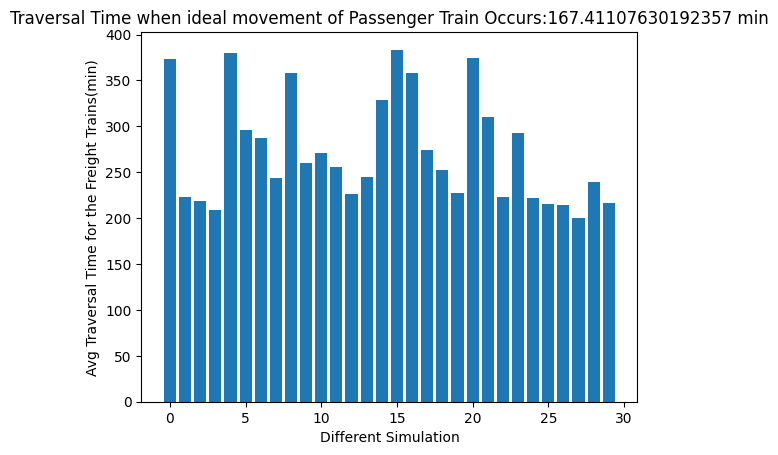

In [ ]:
plt.bar(range(len(avg_traversal_time_list)), avg_traversal_time_list)

plt.xlabel('Different Simulation')
plt.ylabel('Avg Traversal Time for the Freight Trains(min)')
plt.title('Traversal Time when ideal movement of Passenger Train Occurs:167.41107630192357 min')

plt.show()

In [ ]:
with open("TraversalDetails.txt", 'r') as file:
      lines = file.readlines()

# Initialize variables
train_id = None
train_data = []
train_traversal_times = {}

for line in lines:
    if line.startswith('Printing timetables for train'):
        if train_data:
            train_traversal_times[train_id] = calculate_traversal_time(train_data)

        train_id = int(line.split()[-1])
        train_data = []
    else:
        train_data.append(line)

if train_data:
    train_traversal_times[train_id] = calculate_traversal_time(train_data)
traversal_time_list = []

for train_id, traversal_time in train_traversal_times.items():
    traversal_time_list.append(traversal_time)
    print(f"Train {train_id}: Traversal Time - {traversal_time:.2f} minutes")

Train 1: Traversal Time - 185.13 minutes
Train 2: Traversal Time - 187.27 minutes
Train 3: Traversal Time - 205.35 minutes
Train 4: Traversal Time - 212.71 minutes
Train 5: Traversal Time - 260.55 minutes
Train 6: Traversal Time - 253.14 minutes
Train 7: Traversal Time - 250.19 minutes
Train 8: Traversal Time - 251.74 minutes
Train 9: Traversal Time - 253.28 minutes
Train 10: Traversal Time - 257.88 minutes
Train 11: Traversal Time - 265.42 minutes
Train 12: Traversal Time - 203.82 minutes
Train 13: Traversal Time - 205.71 minutes
Train 14: Traversal Time - 213.25 minutes
Train 15: Traversal Time - 220.79 minutes
Train 16: Traversal Time - 228.34 minutes


In [ ]:
Avg_original_traversal_time = sum(traversal_time_list)/len(traversal_time_list)
print("The Average Non-delay situation in passenger train", Avg_original_traversal_time)

The Average Non-delay situation in passenger train 228.41107630192357


In [ ]:
# Define a function to parse the text data and count trains with departure time between 790 and 1240
def count_trains_with_departure_between(file_path, start_time, end_time):
    count = 0
    with open(file_path, 'r') as file:
        for line in file:
            # Split each line by spaces
            dk=None
            parts = line.split()
            # print(parts)
            # list1 = parts.split(' ')
            if "Printing" in parts:
              continue
            if "Departure" in parts:
              # print(parts)

            # Extract departure time from the parts and convert it to float
              dk = float(parts[-1])
            # Check if departure time is between start_time and end_time
            if (dk >= start_time) and (dk<= end_time):
                count += 1
    return count

# File path to the text file containing train data
file_path = "/content/TraversalDetails28.txt"

# Count the number of trains with departure time between 790 and 1240
count = count_trains_with_departure_between(file_path, 790, 1240)

print("Number of trains with departure time between 790 and 1240:", count)


Number of trains with departure time between 790 and 1240: 323
